In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import numpy as np

import random

import matplotlib.pyplot as plt

### Activation Layers

Limitations in Sigmoid and Softmax (Saturation), approach 0 for high and low values of input.

ReLU(), f(x) = max(x,0). No upper limitation

Leaky ReLU(), No upper limitation like ReLU() and for negative inputs it multiplies the input by a small coefficient (0.01)


In [9]:
relu_pytorch = nn.ReLU()

input = torch.tensor(-83.0, requires_grad=True) #input to see how the activation layers behaves
output = relu_pytorch(input)
output.backward()


gradient =input.grad
print(gradient) 

tensor(0.)


In [8]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.5)

input = torch.tensor(-83.0)

output = leaky_relu_pytorch(input)
print(output)
 

tensor(-41.5000)


Understanding how many parameters we have in our neural network. + hidden layers = + parameters = + capacity
Becareful with overfitting.

In [13]:
model = nn.Sequential(
  nn.Linear(10, 6), # (input+1) * output = 66 parameters
  nn.Linear(6, 4), # (input+1) * output = 28 parameters
  nn.Linear(4, 2) # (input+1) * output = 10 parameters 
)

total_param = 0

for parameter in model.parameters():
  total_param += parameter.numel() # .numel() counts parameters
print(total_param)


104


### Parameter Learning Rate
Learning rate is like saying how big is each step you take each iteration.

Careful, may get stucked in local minimun if it is too low.

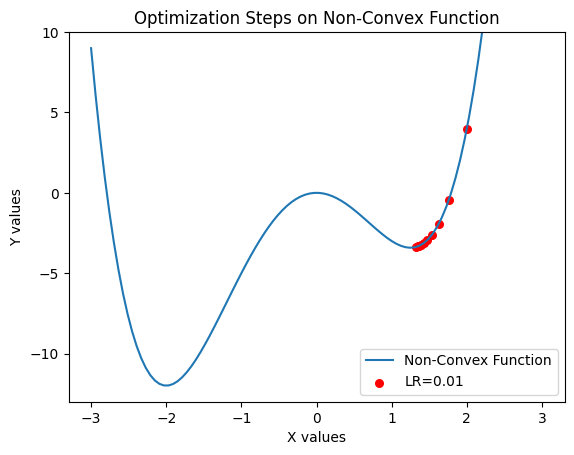

In [122]:

def non_convex_function(x):
    return x**4 + x**3 - 5*x**2

def gradient(x):
    return 4*x**3 + 3*x**2 - 10*x

def optimize_and_plot(learning_rate):
    x_values = []
    y_values = []

    current_position = 2.0
    for _ in range(10):
        x_values.append(current_position)
        y_values.append(non_convex_function(current_position))
        current_position -= learning_rate * gradient(current_position)

    plt.scatter(x_values, y_values, marker='o', color='red', s=30, label=f'LR={learning_rate}')


x_values_function = np.linspace(-3, 3, 100)
y_values_function = non_convex_function(x_values_function)


plt.plot(x_values_function, y_values_function, label='Non-Convex Function')


optimize_and_plot(0.01)

plt.ylim(-13, 10)

plt.title('Optimization Steps on Non-Convex Function')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()




It gets stucked in the first local minimum

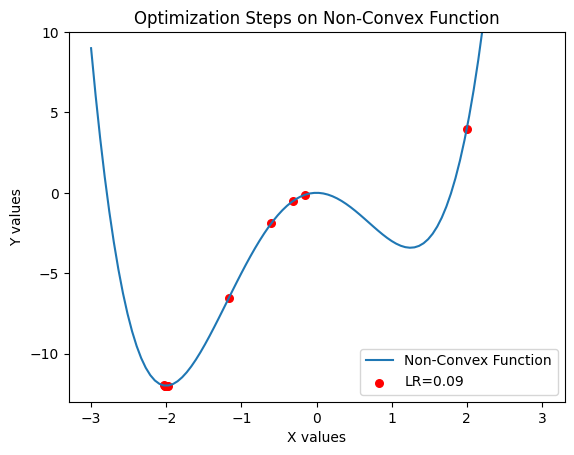

In [124]:

def non_convex_function(x):
    return x**4 + x**3 - 5*x**2

def gradient(x):
    return 4*x**3 + 3*x**2 - 10*x

def optimize_and_plot(learning_rate):
    x_values = []
    y_values = []

    current_position = 2.0
    for _ in range(10):
        x_values.append(current_position)
        y_values.append(non_convex_function(current_position))
        current_position -= learning_rate * gradient(current_position)

    plt.scatter(x_values, y_values, marker='o', color='red', s=30, label=f'LR={learning_rate}')


x_values_function = np.linspace(-3, 3, 100)
y_values_function = non_convex_function(x_values_function)


plt.plot(x_values_function, y_values_function, label='Non-Convex Function')


optimize_and_plot(0.09)

plt.ylim(-13, 10)

plt.title('Optimization Steps on Non-Convex Function')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()


Now it reaches the global minimum and it does not surpass it. Correct learning rate is 0.09

### Parameter Momentum
Optimization methods to speed up the process of finding the lowest point in a cost function. It does this by considering not just the current slope (gradient) but also the historical trends.

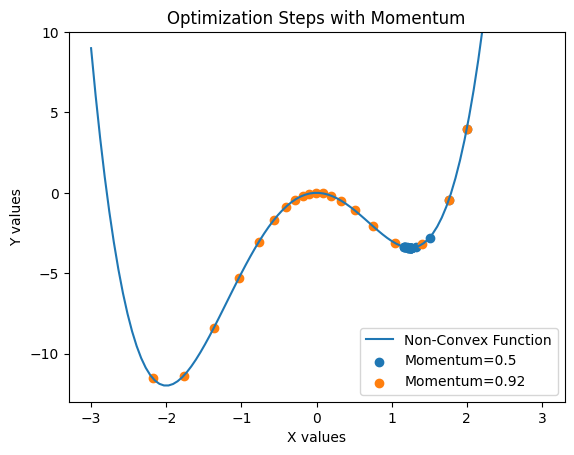

In [133]:

def non_convex_function(x):
    return x**4 + x**3 - 5*x**2

def gradient(x):
    return 4*x**3 + 3*x**2 - 10*x

def optimize_and_plot(momentum):
    x_values = []
    y_values = []

    learning_rate = 0.01
    current_position = 2.0
    previous_velocity = 0.0

    for _ in range(20):
        x_values.append(current_position)
        y_values.append(non_convex_function(current_position))

        velocity = momentum * previous_velocity - learning_rate * gradient(current_position)
        current_position += velocity
        previous_velocity = velocity

    plt.scatter(x_values, y_values, marker='o', label=f'Momentum={momentum}')

x_values_function = np.linspace(-3, 3, 100)
y_values_function = non_convex_function(x_values_function)


plt.plot(x_values_function, y_values_function, label='Non-Convex Function')

optimize_and_plot(0.5)

optimize_and_plot(0.92)


plt.ylim(-13, 10)
plt.title('Optimization Steps with Momentum')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()


As we can see again is really important to choose correctly so it does not get stucked in a local minimum. 